In [1]:
from Plot import *
from VAE import *
from FashionDataloader import *
import torch


/home/vitalex93/miniconda3/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
FILE = 'DAE.pth'
model = VAE(latent_dim=10, dim1=28, dim2=28)
model.load_state_dict(torch.load(FILE))
model.eval()

VAE(
  (encoder): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): LeakyReLU(negative_slope=0.01)
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): Conv2d(64, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
    (5): LeakyReLU(negative_slope=0.01)
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (final_linear): Linear(in_features=3136, out_features=10, bias=True)
  (decoder): Sequential(
    (0): Linear(in_features=10, out_features=3136, bias=True)
    (1): Reshape()
    (2): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): LeakyReLU(negative_slope=0.01)
    (4): ConvTranspose2d(64, 64, kernel_size=(3, 3), stride=(2, 2))
    (5): LeakyReLU(negative_slope=0.01)
    (6): ConvTranspose2d(64, 32, kernel_size=(3, 3), stride=(2, 2))
    (7): LeakyReLU(negative_

/home/vitalex93/miniconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


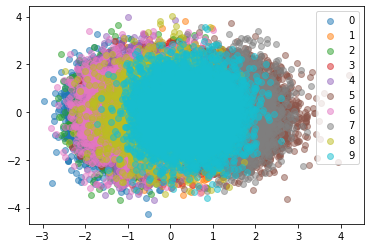

In [3]:
#plot_latent_space_with_labels
#ONLY APPLICABLE WITH latent_dim=2
NUM_CLASSES = 10
DATALOADER = get_FashionMNIST_dataloaders(18)[0]
ENCODING_FN = model.encoding_fn
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

plot_latent_space_with_labels(
    num_classes=NUM_CLASSES,
    data_loader=DATALOADER,
    encoding_fn=ENCODING_FN,
    device=DEVICE)

plt.legend()
plt.show()

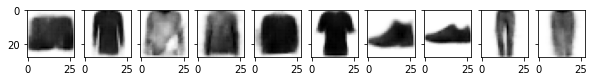

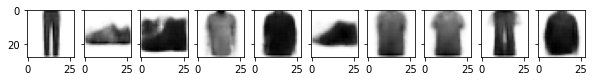

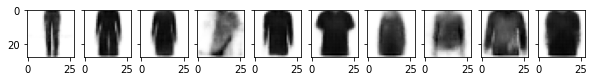

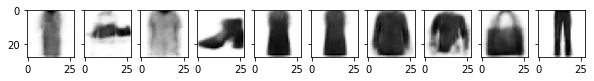

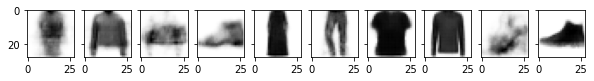

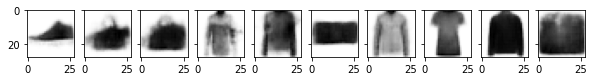

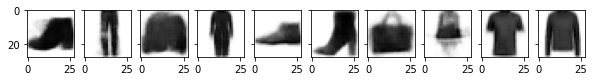

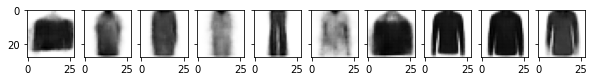

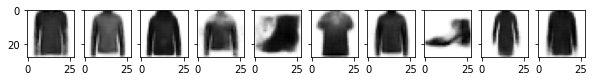

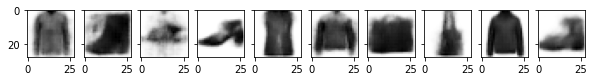

In [4]:
#plot_images_sampled_from_vae
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
LATENT_SIZE = 10
UNNORMALIZER = None
NUM_IMAGES = 10

for i in range(10):
    plot_images_sampled_from_vae(model=model, device=DEVICE, latent_size=LATENT_SIZE)
    plt.show()

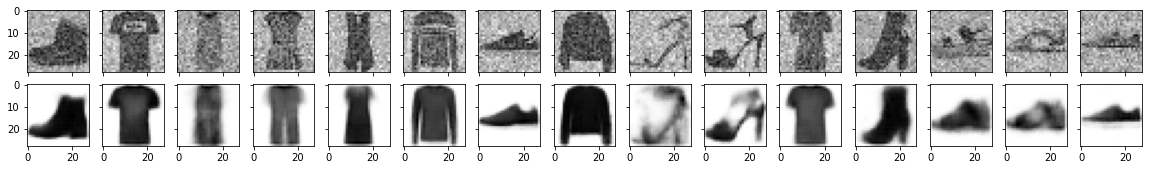

In [5]:
#plot_generated_images
DATALOADER = get_FashionMNIST_dataloaders(18)[0]
MODEL = model
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
UNNORMALIZER = None
NUM_IMAGES = 10
FIG_SIZE = (20, 2.5)
MODEL_TYPE = 'VAE'

plot_generated_images(data_loader=DATALOADER, model=MODEL, device=DEVICE, modeltype='VAE')